In [2]:
import json
import os.path as p
import pandas as pd
from PIL import Image
from tqdm import tqdm_notebook as tqdm
import os
from joblib import Parallel, delayed
import cv2

### COCO Format
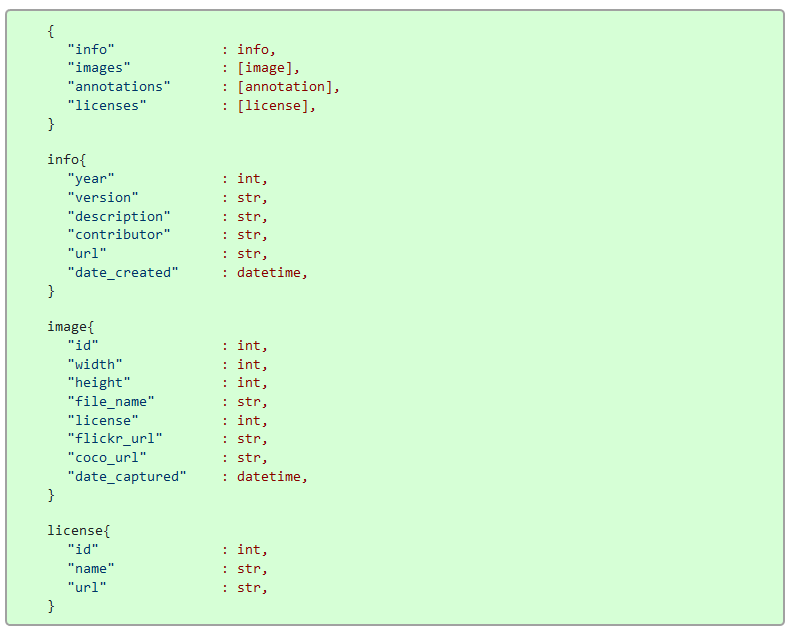

COCO Object Detection Format
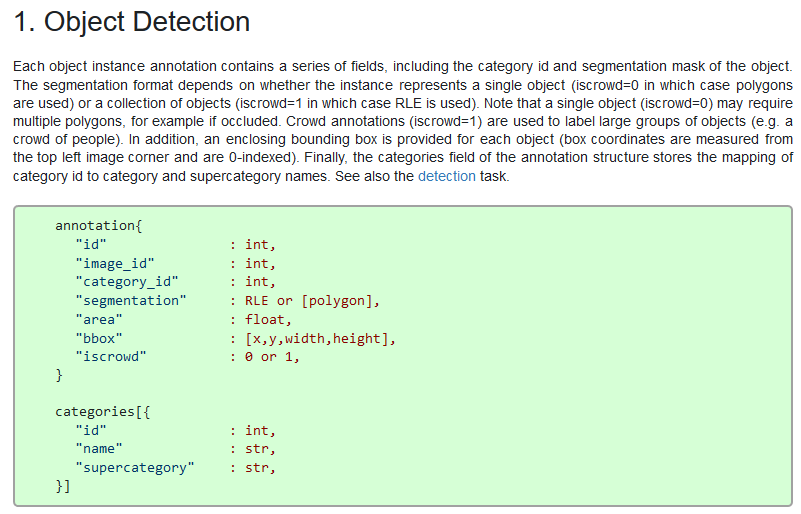

## Open Images

In [3]:
OUT_DIR = '/APL/Datasets/open-images-challenge-2019-COCO-format' 
os.makedirs(OUT_DIR, exist_ok=True)

In [4]:
OPEN_IMG = p.join('/APL/Datasets/open-images-challenge-2019')

#### Read original CSV data

In [112]:
#SET = 'train'
SET = 'validation'
#SET = 'test'

In [113]:
# Boxes
bbox_annotation = pd.read_csv(p.join(OPEN_IMG, 'challenge-2019-' + SET + '-detection-bbox-expanded.csv'))
bbox_annotation

,ImageID,LabelName,XMin,XMax,YMin,YMax,IsGroupOf
0,0001eeaf4aed83f9,/m/0cmf2,0.022673,0.964200,0.071038,0.800546,0
1,0001eeaf4aed83f9,/m/0k5j,0.022673,0.964200,0.071038,0.800546,0
2,0001eeaf4aed83f9,/m/07yv9,0.022673,0.964200,0.071038,0.800546,0
3,000595fe6fee6369,/m/02xwb,0.141384,0.179676,0.676275,0.731707,0
4,000595fe6fee6369,/m/02xwb,0.213549,0.253314,0.299335,0.354767,0
5,000595fe6fee6369,/m/02xwb,0.232695,0.288660,0.490022,0.545455,0
6,000595fe6fee6369,/m/02xwb,0.245950,0.291605,0.547672,0.605322,0
7,000595fe6fee6369,/m/02xwb,0.245950,0.290133,0.660754,0.716186,0
8,000595fe6fee6369,/m/02xwb,0.247423,0.284242,0.379157,0.436807,0
9,000595fe6fee6369,/m/02xwb,0.247423,0.294551,0.607539,0.674058,0


In [114]:
# Define basic JSON data structure
new_data_format = {'info': {'description': 'Open Images Challenge Dataset',
  'url': 'https://storage.googleapis.com/openimages/web/index.html',
  'version': '1.0',
  'year': 2019,
  'contributor': 'Open Image authors, this format: Michael Smith @McGill University',
  'date_created': '2019/07/03'},
                  'images': [],
                  'annotations': [],
                  'categories': []}

In [115]:
# Get all Image IDs
unique_image_ids = bbox_annotation['ImageID'].unique()
unique_image_ids

array(['0001eeaf4aed83f9', '000595fe6fee6369', '00075905539074f2', ...,
       'fff820866f567015', 'fffc2f36b181a4fb', 'ffff21932da3ed01'],
      dtype=object)

In [116]:
# Create image str ID to int ID mapping
im_id_mapping = []
i = 0

for im in tqdm(unique_image_ids):
    im_id_mapping.append((im,i))
    i += 1

In [117]:
im_id_mapping

[('0001eeaf4aed83f9', 0),
 ('000595fe6fee6369', 1),
 ('00075905539074f2', 2),
 ('0007cebe1b2ba653', 3),
 ('0007d6cf88afaa4a', 4),
 ('0008e425fb49a2bf', 5),
 ('0009bad4d8539bb4', 6),
 ('000a045a0715d64d', 7),
 ('000a1249af2bc5f0', 8),
 ('000ada55d36b4bcb', 9),
 ('000c4d66ce89aa69', 10),
 ('00101a0160a05d31', 11),
 ('001083f05db4352b', 12),
 ('0013ea2087020901', 13),
 ('00141571d986d241', 14),
 ('001464cfae2a30b8', 15),
 ('00146ba1e50ed8d8', 16),
 ('00173afdc7581c41', 17),
 ('001840a807e454c7', 18),
 ('001997021f01f208', 19),
 ('0019e544c79847f5', 20),
 ('001a78754e43abc5', 21),
 ('001a794d1865ee47', 22),
 ('001a809ad40a2f84', 23),
 ('001a995c1e25d892', 24),
 ('001ffaceaff5f33f', 25),
 ('0022bffa9abfb554', 26),
 ('0022d0ab1e1347ab', 27),
 ('0022e32008e479cb', 28),
 ('00230c216711fceb', 29),
 ('002aab1d644cae0e', 30),
 ('002b0dc60b1068a9', 31),
 ('002cfe2087f432e0', 32),
 ('002d1dd67c722d98', 33),
 ('002f8241bd829022', 34),
 ('003132be85a0beae', 35),
 ('0032257bf3cd56d0', 36),
 ('00323258

In [118]:
# Write mapping for image ID (string) to int to disk
df = pd.DataFrame(data=im_id_mapping, columns=['ImageID','IntIndex'])
df.to_csv(os.path.join(OPEN_IMG, 'challenge-2019-' + SET + '-image-ID-mapping.csv'), index=False)

In [119]:
# Get all image sizes
results = []
for originalID,newID in tqdm(im_id_mapping):
    im_filename = originalID + '.jpg'
    
    with Image.open(p.join(OPEN_IMG, SET, im_filename)) as image:
        im_size = image.size 
    
    results.append({'file_name': im_filename,
     'height': im_size[1],
     'width': im_size[0],
     'id': newID})

In [120]:
# Make sure above is done
print(len(results))
print(len(im_id_mapping))

34917
34917


In [121]:
# List of images is done -> save
new_data_format['images'] = results

## Class mapping stuff 

In [46]:
#Get category names
category_csv = pd.read_csv(os.path.join(OPEN_IMG,'challenge-2019-classes-description-500.csv'),header=None,names=['MID','Description'])
category_csv

,MID,Description
0,/m/061hd_,Infant bed
1,/m/06m11,Rose
2,/m/03120,Flag
3,/m/01kb5b,Flashlight
4,/m/0120dh,Sea turtle
5,/m/0dv5r,Camera
6,/m/0jbk,Animal
7,/m/0174n1,Glove
8,/m/09f_2,Crocodile
9,/m/01xq0k1,Cattle


In [53]:
# Get label hierarchy (not used)
with open(os.path.join(OPEN_IMG, 'challenge-2019-label500-hierarchy.json')) as f:
    label_hierarchy = json.load(f)
label_hierarchy

{'LabelName': '/m/0bl9f',
 'Subcategory': [{'LabelName': '/m/0242l'},
  {'LabelName': '/m/03120'},
  {'LabelName': '/m/0h8l4fh'},
  {'LabelName': '/m/0138tl',
   'Subcategory': [{'LabelName': '/m/0167gd'},
    {'LabelName': '/m/01j51'},
    {'LabelName': '/m/029b3'},
    {'LabelName': '/m/02zt3'},
    {'LabelName': '/m/0kmg4'}]},
  {'LabelName': '/m/019dx1',
   'Subcategory': [{'LabelName': '/m/0174k2'},
    {'LabelName': '/m/01k6s3'},
    {'LabelName': '/m/029bxz'},
    {'LabelName': '/m/02pjr4'},
    {'LabelName': '/m/02wv84t'},
    {'LabelName': '/m/02x984l'},
    {'LabelName': '/m/03s_tn'},
    {'LabelName': '/m/040b_t'},
    {'LabelName': '/m/04169hn'},
    {'LabelName': '/m/063rgb'},
    {'LabelName': '/m/07xyvk'},
    {'LabelName': '/m/0fx9l'},
    {'LabelName': '/m/0llzx'},
    {'LabelName': '/m/03ldnb'}]},
  {'LabelName': '/m/02pkr5',
   'Subcategory': [{'LabelName': '/m/0130jx'},
    {'LabelName': '/m/01vbnl'},
    {'LabelName': '/m/02f9f_'},
    {'LabelName': '/m/02jz0l'},
 

In [54]:
# Create mapping from name to MID
category_list = []
category_MID_mapping = []
i = 0
for row in category_csv.itertuples():
    # Supercategory = None because we already processed everything using the OID script
    category_list.append({'id': i, 'name': row.Description, 'supercategory': None})
    # Save mapping from original name to new ID
    category_MID_mapping.append((row.MID, i))
    i += 1

In [60]:
# Save mapping to disk
MID_mapping_df = pd.DataFrame(data=category_MID_mapping, columns=['MID','IntIndex'])
MID_mapping_df.to_csv(os.path.join(OPEN_IMG, 'challenge-2019-category-ID-mapping.csv'), index=False)

In [123]:
# Save category data
new_data_format['categories'] = category_list

In [99]:
category_MID_mapping_dict = {}
for i in category_MID_mapping:
    category_MID_mapping_dict[i[0]] = i[1]

## End category stuff

In [125]:
# Create dictinary mapping from Open Images string ID to image info
im_info_map = {p.splitext(i['file_name'])[0]:i for i in new_data_format['images']}    
im_info_map

{'0001eeaf4aed83f9': {'file_name': '0001eeaf4aed83f9.jpg',
  'height': 447,
  'width': 1024,
  'id': 0},
 '000595fe6fee6369': {'file_name': '000595fe6fee6369.jpg',
  'height': 681,
  'width': 1024,
  'id': 1},
 '00075905539074f2': {'file_name': '00075905539074f2.jpg',
  'height': 914,
  'width': 1024,
  'id': 2},
 '0007cebe1b2ba653': {'file_name': '0007cebe1b2ba653.jpg',
  'height': 683,
  'width': 1024,
  'id': 3},
 '0007d6cf88afaa4a': {'file_name': '0007d6cf88afaa4a.jpg',
  'height': 614,
  'width': 1024,
  'id': 4},
 '0008e425fb49a2bf': {'file_name': '0008e425fb49a2bf.jpg',
  'height': 1024,
  'width': 987,
  'id': 5},
 '0009bad4d8539bb4': {'file_name': '0009bad4d8539bb4.jpg',
  'height': 681,
  'width': 1024,
  'id': 6},
 '000a045a0715d64d': {'file_name': '000a045a0715d64d.jpg',
  'height': 680,
  'width': 1024,
  'id': 7},
 '000a1249af2bc5f0': {'file_name': '000a1249af2bc5f0.jpg',
  'height': 678,
  'width': 1024,
  'id': 8},
 '000ada55d36b4bcb': {'file_name': '000ada55d36b4bcb.jp

In [126]:
for r in bbox_annotation.itertuples():
    print(r)
    break

Pandas(Index=0, ImageID='0001eeaf4aed83f9', LabelName='/m/0cmf2', XMin=0.022673031, XMax=0.9642004999999999, YMin=0.07103825, YMax=0.80054647, IsGroupOf=0)


In [76]:
# load line profiler
%load_ext line_profiler

In [102]:
%lprun  -f create_annotations create_annotations(bbox_annotation,im_info_map,MID_mapping_df)

In [127]:
# Create annotations
# def create_annotations(bbox_annotation,im_info_map,MID_mapping_df):
def create_annotations():
#     iter_count = 0
    list_annot = []
    for r in tqdm(bbox_annotation.itertuples(), total=len(bbox_annotation)):
        im_info = im_info_map[r.ImageID]
        im_w = im_info['width']
        im_h = im_info['height']

        x = r.XMin * im_w
        w = (r.XMax - r.XMin) * im_w
        y = r.YMin * im_h
        h = (r.YMax - r.YMin) * im_h

        #Get real category name (iloc = 0 is first match)
        category_real_name = category_MID_mapping_dict[r.LabelName]

        list_annot.append({'id': r.Index,
                     'image_id': im_info['id'],
                     'category_id': category_real_name,
                     'bbox': [x, y, w, h],
                     'segmentation': [[x, y, x, y + h, x + w, y + h, x + w, y]],
                     'area': w * h,
                     'iscrowd': r.IsGroupOf}) # isGroupOf is ~ iscrowd in COCO terms, but not exactly.  To get proper evaluation we need to run Google's eval code anyway so not that important
#         iter_count += 1
#         if iter_count == 5000:
#             return list_annot
    return list_annot

In [128]:
list_annot = create_annotations()

In [129]:
new_data_format['annotations'] = list_annot

In [130]:
new_data_format

{'info': {'description': 'Open Images Challenge Dataset',
  'url': 'https://storage.googleapis.com/openimages/web/index.html',
  'version': '1.0',
  'year': 2019,
  'contributor': 'Open Image authors, this format: Michael Smith @McGill University',
  'date_created': '2019/07/03'},
 'images': [{'file_name': '0001eeaf4aed83f9.jpg',
   'height': 447,
   'width': 1024,
   'id': 0},
  {'file_name': '000595fe6fee6369.jpg', 'height': 681, 'width': 1024, 'id': 1},
  {'file_name': '00075905539074f2.jpg', 'height': 914, 'width': 1024, 'id': 2},
  {'file_name': '0007cebe1b2ba653.jpg', 'height': 683, 'width': 1024, 'id': 3},
  {'file_name': '0007d6cf88afaa4a.jpg', 'height': 614, 'width': 1024, 'id': 4},
  {'file_name': '0008e425fb49a2bf.jpg', 'height': 1024, 'width': 987, 'id': 5},
  {'file_name': '0009bad4d8539bb4.jpg', 'height': 681, 'width': 1024, 'id': 6},
  {'file_name': '000a045a0715d64d.jpg', 'height': 680, 'width': 1024, 'id': 7},
  {'file_name': '000a1249af2bc5f0.jpg', 'height': 678, 'wid

In [131]:
OUTPUT_JSON = p.join(OUT_DIR, SET + '.json')

In [132]:
#Output to file
with open(OUTPUT_JSON, 'w') as f:
    json.dump(new_data_format,f)